### What is logistic regression?
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

Logistic regression is a linear classifier.<br>
Defining a linear function called <b>logit</b> we have 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ<br>
> where variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the predicted weights or just coefficients.

The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)).
<br>As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.


Our aim is to find the best values of the weights b<sub>0</sub>, b<sub>1</sub>...b<sub>n</sub>

To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the maximum likelihood estimation and is represented by the equation LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ))).

### What is sigmoid function?
A sigmoid function is a mathematical function with a characteristic "S"-shaped curve or sigmoid curve. It transforms any value in the domain to a number between 0 and 1 ( Helpful in categorizing values ).

### Some more insight into LLF (log likelihood function)

When 𝑦ᵢ = 0, the LLF for the corresponding observation is equal to log(1 − 𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, then log(1 − 𝑝(𝐱ᵢ)) is close to 0. This is the result you want. If 𝑝(𝐱ᵢ) is far from 0, then log(1 − 𝑝(𝐱ᵢ)) drops significantly. You don’t want that result because your goal is to obtain the maximum LLF. Similarly, when 𝑦ᵢ = 1, the LLF for that observation is 𝑦ᵢ log(𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 1, then log(𝑝(𝐱ᵢ)) is close to 0. If 𝑝(𝐱ᵢ) is far from 1, then log(𝑝(𝐱ᵢ)) is a large negative number.

The method to calculate the LLF is handled by the python packages so that eases our job.

### Implementation of logistic regression using sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# Create Dataset
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
# Train and fit model
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

#### Some parameters of the model are:

1. penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

2. dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

3. tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

4. C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

5. fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

6. intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

7. class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

8. random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

9. solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

10. max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

11. multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

12. verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

13. warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

14. n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

15. l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

In [21]:
# Check how many classes or categories are there in y
model.classes_

array([0, 1])

In [22]:
# show intercept and coefficient b1
print(model.intercept_)
print(model.coef_)

[-1.04608067]
[[0.51491375]]


In [23]:
# Check perfomance.
# .predict_proba() returns the matrix of probabilities that the predicted output is equal to zero or one
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [24]:
# Predict on train-data
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# Evaluate model
model.score(x, y)

0.9

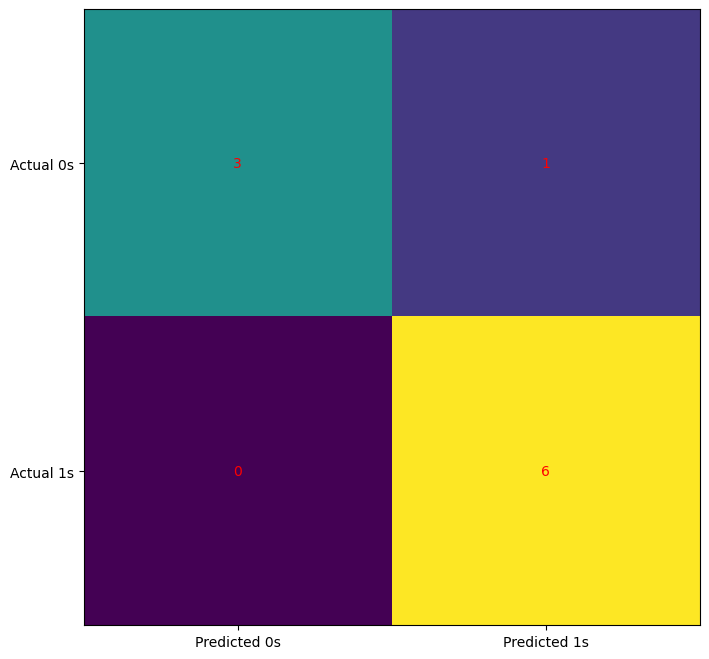

In [26]:
# Print confusion matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [27]:
# Get model report
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



### Improving Model

#### Adjusting regularization strength
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

In [28]:
print(model.intercept_)

print(model.coef_)

print(model.predict_proba(x))

print(model.predict(x))

[-1.04608067]
[[0.51491375]]
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]
[0 0 0 1 1 1 1 1 1 1]


As you can see, the absolute values of the intercept 𝑏₀ and the coefficient 𝑏₁ are larger. This is the case because the larger value of C means weaker regularization, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.

Different values of 𝑏₀ and 𝑏₁ imply a change of the logit 𝑓(𝑥), different values of the probabilities 𝑝(𝑥), a different shape of the regression line, and possibly changes in other predicted outputs and classification performance. The boundary value of 𝑥 for which 𝑝(𝑥)=0.5 and 𝑓(𝑥)=0 is higher now. It’s above 3. In this case, you obtain all true predictions, as shown by the accuracy, confusion matrix, and classification report:

In [29]:
print(model.score(x, y))

print(confusion_matrix(y, model.predict(x)))

print(classification_report(y, model.predict(x)))

0.9
[[3 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

